# _Python for Scientific Data Analysis_


#  AstroPy and AstroQuery

## Section 2b: Units and Constants



As before, we start off with the basic library import commands:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Also, for this section, we will be grabbing files from the ./sect2/code/files/ directory often.  So we save this as a variable

In [3]:
directory='./code/sect2/files/'


Astropy allows the ability to give variables the attribute of ``units``.   E.g. instead of just a variable that represents a length, astropy saves it as an object with an attribute of meters (or microns or kilometers, etc.).   This is useful for a number of things, including debugging and automatic unit conversion without having to do much thinking.  Very helpful.

Similarly, astropy saves a large number of ``constants``, so you do not have to reenter them. 

To load these modules, add the following lines to code:

In [4]:
import astropy.units as u #since 'units' takes too long to type

#from astropy.constants import [name of the constants]
#an example ... gravitational constant, Planck constant, Boltzmann's constant
from astropy.constants import G,h,k_B

To make ``units`` and ``constants`` work with plotting routines, you also should ``from astropy.visualization import quantity_support``.  

The official tutorial on units and constants in astropy is very good, so I will repeat it with only minor modifications here.

For reference, the full list of units is here:

[https://kbarbary-astropy.readthedocs.io/en/latest/units/index.html]()

and constants here:

[https://docs.astropy.org/en/stable/constants/index.html#module-astropy.constants]()
 

Units can then be accessed as **`u.<unit>`**.  For example, the meter unit is:

In [27]:
u.m

Unit("m")

Variables called using the units subpackage have docstring capability.   To access, the doc string (which explains what the variable is all about) do **`u.<unit>`.__doc__**.  E.g.

In [29]:
print(u.m.__doc__)
print(u.pc.__doc__)
print(u.kg.__doc__)

meter: base unit of length in SI
parsec: approximately 3.26 light-years.
kilogram: base unit of mass in SI.


You can also access the physical type of a unit:

In [30]:
print(u.m.physical_type)
print(u.kg.physical_type)

length
mass


Units can also have aliases:

In [31]:
print(u.m.aliases)
print(u.arcsec.aliases)

['meter']
['arcsecond']


By default, ``units`` uses Si and cgs units.    You can use imperial units by attaching the ``imperial`` prefix:

In [32]:
#u.inch #this doesn't work
u.imperial.inch #this works

Unit("inch")

#### _Quantities and Units_

When you use ``units`` you store a variable that has both a ``value`` and a ``unit`` (naturally).   Often, if you try to do multiplication with a variable generated from ``units`` you will get errors thrown: what you really want is the ``value`` of the unit.  Other times, you are interested in just the unit.  

To return these properties ...

Value -   type **`<variable name>.value`**

Unit -    type **`<variable name>.unit`**

E.g.

In [33]:
r_planet=16.9*u.au

r_planet_val=r_planet.value
print(r_planet_val*5)
print(np.log10(r_planet_val*5))

r_planet_unit=r_planet.unit
print(r_planet_unit)

84.5
1.9268567089496924
AU


#### _Unit Conversions_

This is where ``units`` becomes the most useful, in my opinion.   

To convert units you add the property ``.to(unit.[unitname])``

E.g.

In [35]:
r_planet=16.9*u.au

r_planet_km=r_planet.to(u.km)
print(r_planet_km)

#confirm manually
#16.9x 1.496e8 = 2.582e9

2528204014.8299994 km


### Examples

1. Galaxy mass

In this first example, we will use ``Quantity`` objects to estimate a hypothetical galaxy's mass, given its half-light radius and radial velocities of stars in the galaxy.

Let's assume that we measured the half-light radius of the galaxy to be 29 pc projected on the sky at the distance of the galaxy. This radius is often called the "effective radius", so we'll store it as a ``Quantity`` object with the name ``R_eff``. 

We can create a Quantity object by multiplying the value with its unit. Units are accessed as u."unit", in this case u.pc.

In [36]:
R_eff=29*u.pc
print("the value is",R_eff.value)
print("the unit is",R_eff.unit)

the value is 29.0
the unit is pc


Note, this is a sleek way of creating quantity objects.  The more verbose way is

In [13]:
R_eff=u.Quantity(29,unit=u.pc)

Now, you can access both the value and unit of a ``Quantity`` using the ``value`` and ``unit`` attributes.  E.g.

In [37]:

print("""Half light radius
value: {0}
unit: {1}""".format(R_eff.value, R_eff.unit))
#prints out...
#Half light radius
#value:29.0
#unit: pc

#slightly less elegant way...
print("The Half light radius value is {0:.1f} and unit is {1:s}".format(R_eff.value,R_eff.unit))
#prints out ...
#The Half light radius value is 29.0 and unit is pc


Half light radius
value: 29.0
unit: pc
The Half light radius value is 29.0 and unit is pc


The half-light radius is in parsecs.  We can convert this to any other length unit.  E.g.

In [38]:

print("{0:.3g}".format(R_eff.to(u.m))) # meters
#8.95e+17 m
print("{0:.3g}".format(R_eff.to(u.lyr))) # light-years
#94.6 lyr
print("{0:.3g}".format(R_eff.to(u.um))) # microns
#8.95e+23 um


8.95e+17 m
94.6 lyr
8.95e+23 um


Next, we'll first create a synthetic dataset of radial velocity measurements, assuming a normal distribution with a mean velocity of 206 km/s and a velocity dispersion of 4.3 km/s.

In [42]:
vmean = 206
sigin = 4.3
v = np.random.normal(vmean, sigin, 500)*u.km/u.s

v.unit

Unit("km / s")

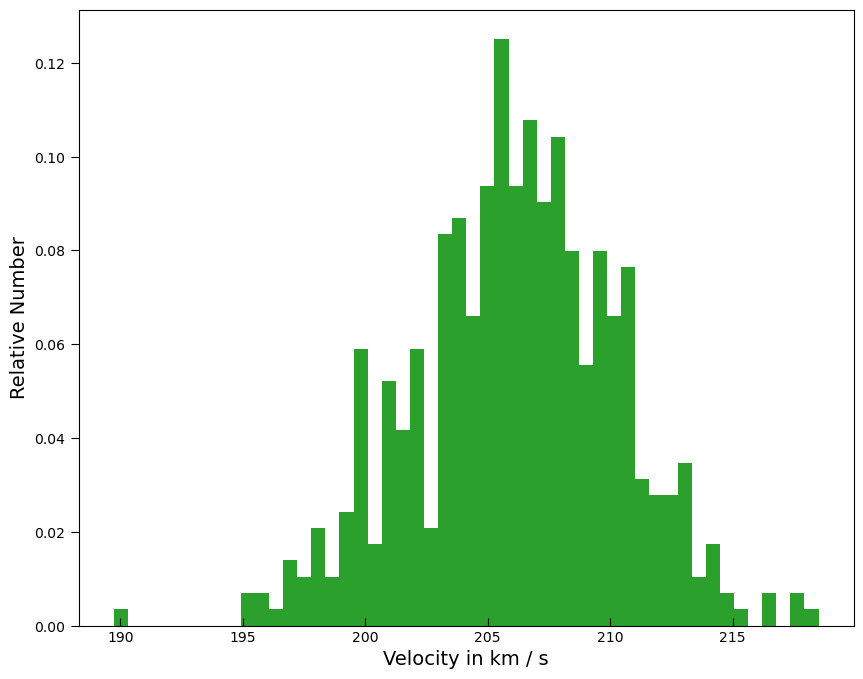

In [43]:
from matplotlib import ticker
fig,axes=plt.subplots(figsize=(10,8))
axes.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
axes.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
axes.tick_params(which='both', axis='x',direction='in')
axes.tick_params(which='major',length=6)
axes.tick_params(which='minor',length=3)
axes.set_xlabel('Velocity in {0:s}'.format(v.unit),fontsize=14)
axes.set_ylabel('Relative Number',fontsize=14)

axes.hist(v.value,bins=50,density=True,color='tab:green');


And then convert the radial-velocities to m/s

In [44]:
#print("First 10 radial velocity measurements: in {0} km/s".format(v.value[:10]))
#print("First 10 radial velocity measurements: {0} {1}".format(v[:10],v.to(u.m/u.s)[:10]))
print("First 3 radial velocity measurements:\n {0} km/s \n or {1} m/s".format(v.value[:3],v.to(u.m/u.s).value[:3]))
#First 10 radial velocity measurements: [197.75728427 208.75234195 209.30692068 210.00891746 204.54189052
# 204.62432297 211.97852361 216.22527279 208.21670381 215.05119579] [197757.28427385 208752.34194905 209306.92068342 210008.91745652
# 204541.89052166 204624.32297168 211978.52360975 216225.27279323
# 208216.70380613 215051.19578812] m / s
#print(v.value[:10])

First 3 radial velocity measurements:
 [203.44618332 203.82270424 203.43137591] km/s 
 or [203446.18331647 203822.70424386 203431.37591444] m/s


One can ocassionally run into issues when attempting to plot Quantity objects with matplotlib libraries. It is always possible to fix this by passing the value array (e.g., v.value) to matplotlib functions. However, calling the astropy.visualization.quantity_support() function will change the settings on your matplotlib session to better handle astropy Quantity objects:

``quantity_support()``

Now we can plot a histogram of the velocity dataset. Note that, due to calling quantity_support, the x-axis is automatically labeled with the correct units.

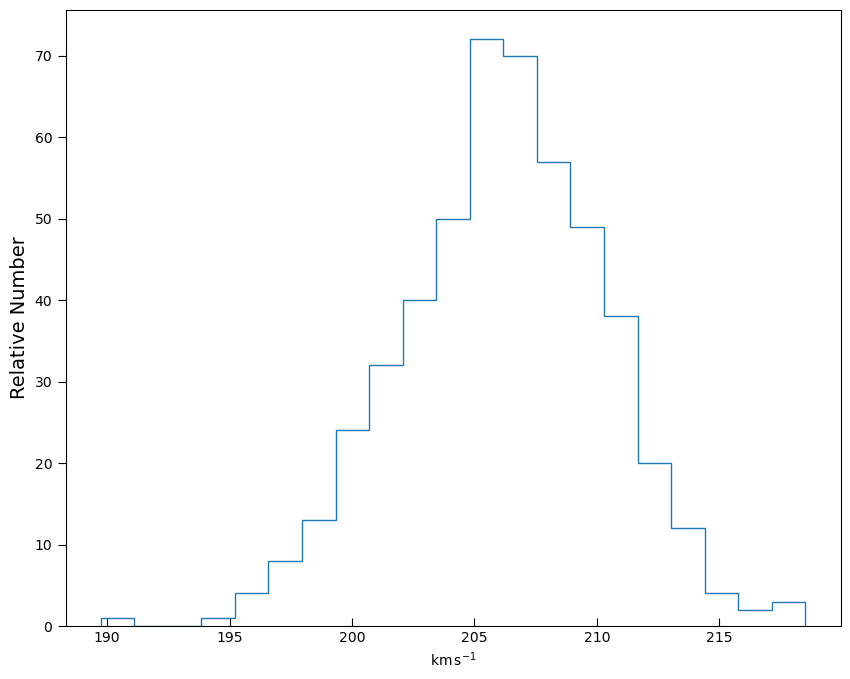

In [45]:
from astropy.visualization import quantity_support
def plot_v():
 fig,axes=plt.subplots(figsize=(10,8))
 quantity_support()

 axes.tick_params(which='both', axis='x',direction='in')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.set_ylabel('Relative Number',fontsize=14)
 axes.hist(v,bins='auto',histtype='step')
 #plt.show()

plot_v()



Now we can calculate the velocity dispersion of the galaxy. This demonstrates how you can perform basic operations like subtraction and division with Quantity objects, and also use them in standard numpy functions such as mean() and size(). They retain their units through these operations just as you would expect them to.

In [46]:

sigma = np.sqrt(np.sum((v - np.mean(v))**2) / np.size(v))
print("Velocity dispersion: {0:.2f}".format(sigma))
#Velocity dispersion: 4.27 km / s


Velocity dispersion: 4.16 km / s


Note how we needed to use numpy square root function, because the resulting velocity dispersion quantity is a numpy array. If we used the python standard math library's sqrt function instead, we get an error.

In [47]:
sigma_scalar = np.sqrt(np.sum((v - np.mean(v))**2) / len(v))
print(sigma_scalar)

4.163892221206489 km / s


In general, you should only use numpy functions with Quantity objects, not the math equivalents, unless you are sure you understand the consequences.

Now for the actual mass calculation. If a galaxy is pressure-supported (for example, an elliptical or dwarf spheroidal galaxy), its mass within the stellar extent can be estimated using a straightforward formula: M1/2=4σ2Reff/G
. There are caveats to the use of this formula for science -- see Wolf et al. 2010 for details. For demonstrating Quantity, you can accept that this is often good enough. For the calculation, we can multiply the quantities together, and astropy will keep track of the units.

In [49]:

M = 4*sigma**2*R_eff/G
print(M)
#30300318360313.01 kg km2 pc / m3


30133614279543.535 km2 kg pc / m3


The result is in a composite unit, so it's not really obvious it's a mass. However, it can be decomposed to cancel all of the length units (km2pc/m3) using the decompose() method.

In [50]:
M.decompose()
#9.349701307646912e+35 kg

<Quantity 9.2982618e+35 kg>

We can also easily express the mass in whatever form you like -- solar masses are common in astronomy, or maybe you want the default SI and CGS units.

In [51]:

print("""Galaxy mass
in solar units: {0:.3g}
SI units: {1:.3g}
CGS units: {2:.3g}""".format(M.to(u.Msun), M.si, M.cgs))

#Galaxy mass
# in solar units: 4.98e+05 solMass
# SI units: 9.9e+35 kg
# CGS units: 9.9e+38 g


Galaxy mass
in solar units: 4.68e+05 solMass
SI units: 9.3e+35 kg
CGS units: 9.3e+38 g


Or, if you want the log of the mass, you can just use np.log10 as long as the logarithm's argument is dimensionless.

In [54]:
#print(np.log10(M))
print(np.log10(M.value))
#13.488440727046973
print(np.log10(M.to_value(u.Msun)))
#5.668423518011041


13.47905122485371
5.669895859715176


However, you can't take the log of something with units, as that is not mathematically sensible. So ``np.log10(M)`` will trigger an error.